In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

plt.rcParams["font.family"] = "TeX Gyre Schola Math"

print("Disc Model")

Disc Model


## Data extraction

In here we are going to extract the values that we need from the columns of the txt file $'VelRad.txt'$. This data comes from the article of Chemin and al. from 2009 and will be used to model the disc of M31.

In [468]:
#Create some empty lists and an angle allowing us to plot ellipses
t = np.linspace(0, 2*np.pi, 3000)
x, y, z = [], [], [] #Contain the positions after the inclination but not after the PA rotation
a, b    = [], [] #semi-major axis and semi-minor axis
radius  = [] #Radius from the center in arcmin
PAang   = [] #Position angle in degrees
iang    = [] #Inclination angle in degrees
vel     = [] #Velocity in km/s
dens    = [] #Surface density in solar masses per parsec

#We first extract our data
f = open('VelRad.txt', 'r')

for line in f:
    columns = line.split()
    Test = True
    try:
        A = float(columns[0])/60
        B = float(columns[4])*np.pi/180
        C = float(columns[7])*np.pi/180
        D = float(columns[8])
    except:
        Test = False
        
    if Test == True:
        radius.append(A)
        PAang.append(np.pi/2 - B)
        iang.append(C)
        vel.append(D)
        
        
#The x, y, z lists will be lists of lists for each radius and we already make the inclination transformation
for i in range(len(radius)):
    if radius[i] < 2.5:
        a.append(radius[i])
        b.append(radius[i]*np.cos(iang[i]))
        x.append(a[i]*np.cos(t))
        y.append(b[i]*np.sin(t))
        z.append(-radius[i]*np.sin(iang[i])*np.sin(t))
    else:
        break
        
X, Y, Z = [], [], []

#We treat the PA rotation independently now
for i in range(len(x)):
    X.append(x[i]*np.cos(PAang[i]) - y[i]*np.sin(PAang[i]))
    Y.append(x[i]*np.sin(PAang[i]) + y[i]*np.cos(PAang[i]))

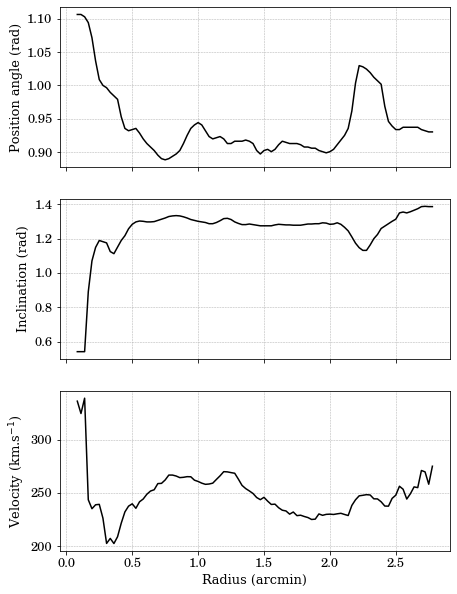

In [469]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(7, 10))

ax1.plot(radius, PAang, c='black')
ax1.set_ylabel('Position angle (rad)', fontname = 'Serif', size = 13)
ax1.grid(linestyle='--', linewidth ='0.5')
ax1.yaxis.set_tick_params(labelsize=13)

ax2.plot(radius, iang, c='black')
ax2.set_ylabel('Inclination (rad)', fontname = 'Serif', size = 13)
ax2.grid(linestyle='--', linewidth ='0.5')
ax2.yaxis.set_tick_params(labelsize=13)

ax3.plot(radius, vel, c='black')
ax3.set_xlabel('Radius (arcmin)', fontname = 'Serif', size = 13)
ax3.set_ylabel(r'Velocity (km.s$^{-1}$)', fontname = 'Serif', size = 13)
ax3.grid(linestyle='--', linewidth ='0.5')
ax3.xaxis.set_tick_params(labelsize=13)
ax3.yaxis.set_tick_params(labelsize=13)

#plt.savefig('PosIncVel.pdf')
plt.show()

## Representation of M31 model

Here we show how M31 should look based on the model and where the gradient represents the depth.

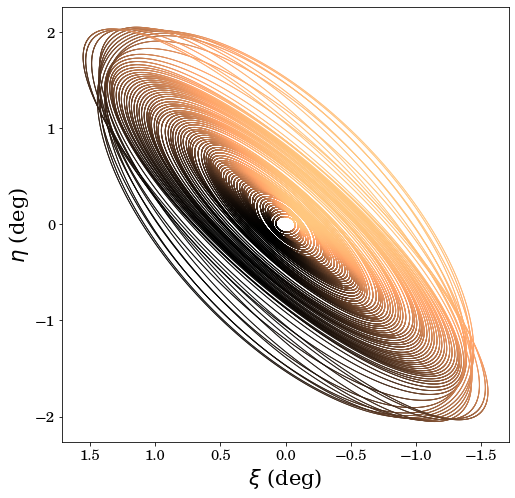

In [472]:
plt.figure(figsize=(8, 8))
for i in range(len(x)):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.gca().invert_xaxis()
#plt.colorbar(label="Like/Dislike Ratio", orientation="vertical")
#plt.savefig('Ara.png', dpi=500)
plt.show()

## Ellipse check:

In [473]:
def EllipsesCrossed(x, y, pa, a, b):
    COUNT = 0
    EllipseList = []
    
    def Condition(count):
        R_rot = np.array([[np.cos(np.pi/2 - pa[count]), -np.sin(np.pi/2 - pa[count])], [np.sin(np.pi/2 - pa[count]), np.cos(np.pi/2 - pa[count])]])   
        Ell_rot = np.dot(R_rot, [x, y])    
        Condition = (Ell_rot[0]**2)/(b[count]**2) + (Ell_rot[1]**2)/(a[count]**2)
        return Condition
    
    IsIt = Condition(COUNT)
    
    for i in range(len(a)):
        IsIt = Condition(i)
        if IsIt >= 1:
            EllipseList.append(i)
        else:
            continue
    """
    while IsIt >= 1:
        COUNT += 1
        IsIt   = Condition(COUNT)
    """
    return EllipseList

[0]


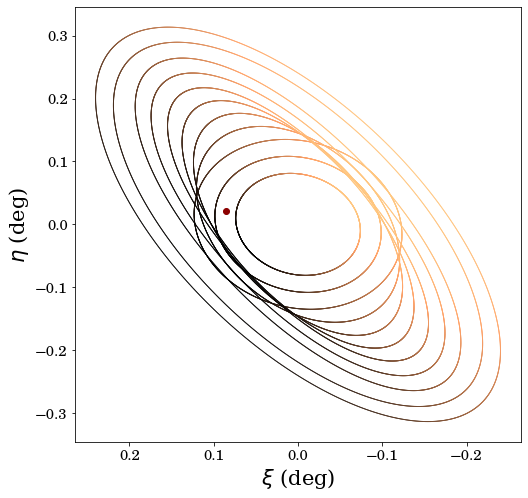

In [474]:
import random 

plt.figure(figsize=(8, 8))
for i in range(11):
    plt.scatter(X[i], Y[i], c=-z[i], cmap='copper', s=1, linewidth=0)
    
#plt.scatter(X[NumBeR], Y[NumBeR], c=-z[NumBeR], cmap='copper', s=1, linewidth=0)
    
xrand = random.random()*0.19
yrand = random.random()*0.14

print(EllipsesCrossed(xrand, yrand, PAang, a, b))

plt.scatter(xrand, yrand, c='darkred')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(r'$\xi$ (deg)', fontname = 'Serif', size = 21)
plt.ylabel(r'$\eta$ (deg)', fontname = 'Serif', size = 21)
plt.gca().invert_xaxis()
plt.show()

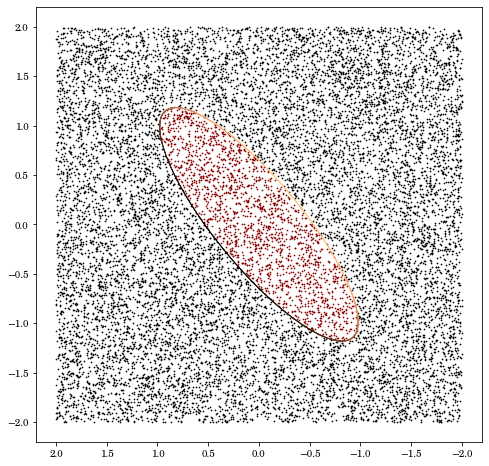

In [476]:
def Condition(x, y, pa, A, B):
    R_rot = np.array([[np.cos(pa), -np.sin(pa)], [np.sin(pa), np.cos(pa)]])   
    Ell_rot = np.dot(R_rot, [x, y])    
    Condition = (Ell_rot[0]**2)/(B**2) + (Ell_rot[1]**2)/(A**2)
    return Condition
XRand, YRand = [], []

for i in range(15060):
    XRand.append(random.uniform(-1, 1)*2)
    YRand.append(random.uniform(-1, 1)*2)
    
InX = [] #Empty list that will contain the X coordonnates of the points inside of the ellipse
InY = []
OutX = [] #Empty list that will contain the X coordonnates of the points outside of the ellipse
OutY = []

EL = 50


for i in range(0, 15060): #Verifies if a point is inside or ouside
    if (Condition(XRand[i], YRand[i], np.pi/2 - PAang[EL], a[EL], b[EL]) < 1):
        InX.append(XRand[i])
        InY.append(YRand[i])
    else:
        OutX.append(XRand[i])
        OutY.append(YRand[i])
        
plt.figure(figsize=(8, 8))
plt.scatter(OutX, OutY, c='black', s=0.5)
plt.scatter(InX, InY, c='darkred', s=0.5)
plt.scatter(X[EL], Y[EL], c=-z[EL], cmap='copper', s=1, linewidth=0)
plt.gca().invert_xaxis()
plt.show()